# **Loan Approval Prediction**
In this problem, we will try to decide where a particular ID get the loan. we take the decision by different machine learning algoritms


In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

In [3]:
train_df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")    #importing the dataset
print(train_df.info())                 #Brief description about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


We can clearly see there are 13 columns and there are missing data points in the dataset.


In [4]:
train_df = train_df.drop(columns= ["Loan_ID"])



# Analyzing the dataset by graphs

By looking at the graphs, We will try to get some conclusions. This is a very important step. All having a data like this, We can 

1) generalise or remove the columns which doesnt have any 
significane on making the decision. 

2) remove the outliners. On large datasets, the computation can  be decreased.

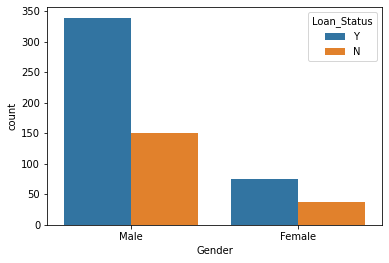

In [5]:
sb.countplot(x=train_df['Gender'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

Most of the people who apply are men (3 times more) and there are higher chances the loan gets sanctioned if the applicant sex is 'Male'

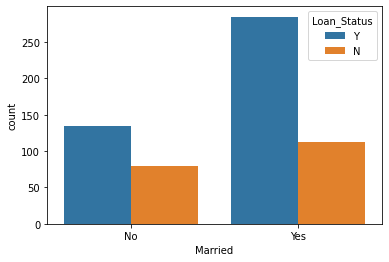

In [6]:
sb.countplot(x=train_df['Married'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

2/3 rd of the people who applied for loan are married and married applicants are more likely to get loan sanctioned

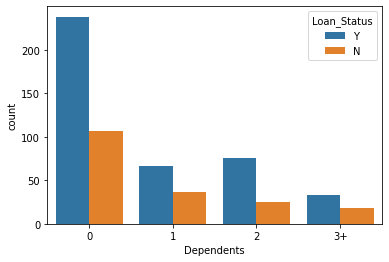

In [7]:
sb.countplot(x=train_df['Dependents'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

If the dependants are 0, there is highly likely that loan is approved

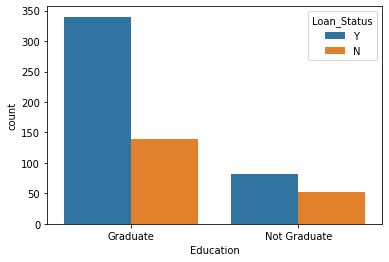

In [8]:
sb.countplot(x=train_df['Education'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

Graduated population are more likely to get the loan

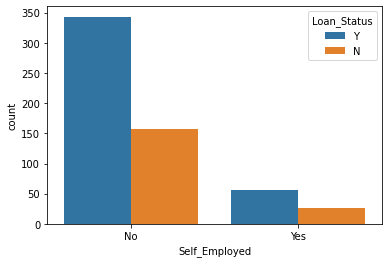

In [9]:
sb.countplot(x=train_df['Self_Employed'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

5/6th of population is not self employed

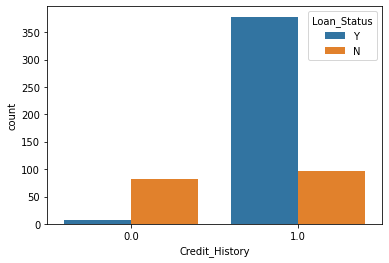

In [10]:
sb.countplot(x=train_df['Credit_History'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

Applicant with credit history are far more likely to be accepted.

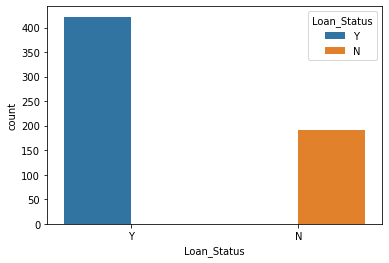

In [11]:
sb.countplot(x=train_df['Loan_Status'], data=train_df, hue='Loan_Status')

**Interpreted data from above graph**

We can conclude, 2/3 of people who applied got there loan sanctioned.


# **Preprocessing the data**
The data needs to be pre processed to fit to the model. 2 reasons why this is mandatory is 


*   Missing values (Imputing)
*   few columns have features in test format. these needs to be converted in number format (Encoding).



In [12]:
train_df_encoded = pd.get_dummies(train_df,drop_first=True) #Convert categorical variable into dummy/indicator variables.
print(train_df_encoded.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0

In [13]:
X = train_df_encoded.drop(columns='Loan_Status_Y')
Y = train_df_encoded['Loan_Status_Y']

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


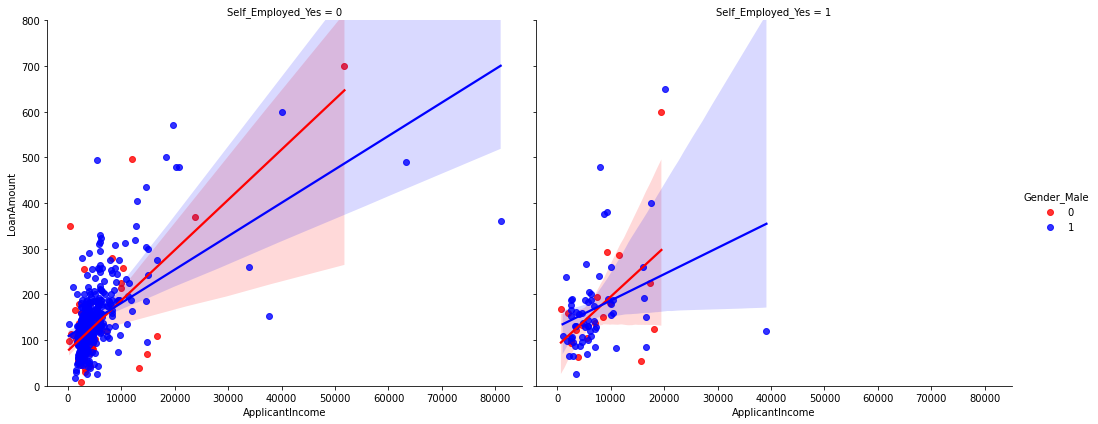

In [14]:
g = sb.lmplot(x='ApplicantIncome',y='LoanAmount',data= train_df_encoded , col='Self_Employed_Yes', hue='Gender_Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))

Above graph tells:

* The male applicants take more amount of loan than female.
* The males are higher in number of "NOT self employed" category.
* Majority of applicants are NOT self employed.
* The majority of income taken is about 0-200 with income in the range 0-20000.


# Train and Test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,stratify =Y) 

In [16]:
from sklearn.impute import SimpleImputer
temp = SimpleImputer(strategy='mean')
X_train = temp.fit_transform(X_train)
X_test = temp.fit_transform(X_test)

# LINEAR REGRESSION FOR CLASSIFICATION

In [17]:
from sklearn.linear_model import LinearRegression
lrc = LinearRegression()
lrc.fit(X_train, Y_train)
temp= lrc.predict(X_test)
Y_pred_lrc = []

In [18]:
for i in temp:
  if i>0.5:
    Y_pred_lrc.append(1)
  else:
    Y_pred_lrc.append(0) 

In [19]:
from sklearn.metrics import accuracy_score
# Accuracy score
result2 = accuracy_score(Y_test, Y_pred_lrc)
print("\nAccuracy:",result2)


Accuracy: 0.7723577235772358


# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

result2 = accuracy_score(Y_test, Y_pred_LR)
print("\nAccuracy:",result2)


Accuracy: 0.7723577235772358


# SUPPORT VECTOR MACHINES (SVM)







In [22]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train) 
Y_pred_SVM = SVM.predict(X_test)

In [23]:
# Accuracy score
result2 = accuracy_score(Y_test, Y_pred_SVM)
print("\nAccuracy:",result2)


Accuracy: 0.7642276422764228


# RANDOM FOREST CLASSIFIER

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)

In [25]:
# Accuracy score
result2 = accuracy_score(Y_test, Y_pred_rf)
print("\nAccuracy:",result2)


Accuracy: 0.7723577235772358


# NEURAL NETWORK

In [26]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16 ,activation='relu',input_shape=(14,))) 
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,epochs=300,verbose=1, validation_split=0.1)
accuracy = model.evaluate(X_test,Y_test)[1]


Epoch 1/300
14/14 [==============================] - 1s 16ms/step - loss: 267.4665 - accuracy: 0.5147 - val_loss: 45.8917 - val_accuracy: 0.4400
Epoch 2/300
14/14 [==============================] - 0s 4ms/step - loss: 253.9841 - accuracy: 0.5397 - val_loss: 58.8019 - val_accuracy: 0.7400
Epoch 3/300
14/14 [==============================] - 0s 4ms/step - loss: 210.4225 - accuracy: 0.5941 - val_loss: 55.6392 - val_accuracy: 0.7400
Epoch 4/300
14/14 [==============================] - 0s 4ms/step - loss: 191.5871 - accuracy: 0.5782 - val_loss: 38.2939 - val_accuracy: 0.6000
Epoch 5/300
14/14 [==============================] - 0s 4ms/step - loss: 168.5242 - accuracy: 0.5374 - val_loss: 34.5471 - val_accuracy: 0.6000
Epoch 6/300
14/14 [==============================] - 0s 4ms/step - loss: 140.7908 - accuracy: 0.5420 - val_loss: 35.3168 - val_accuracy: 0.6200
Epoch 7/300
14/14 [==============================] - 0s 4ms/step - loss: 114.9193 - accuracy: 0.5374 - val_loss: 27.2228 - val_accuracy

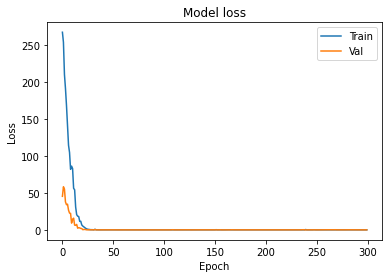

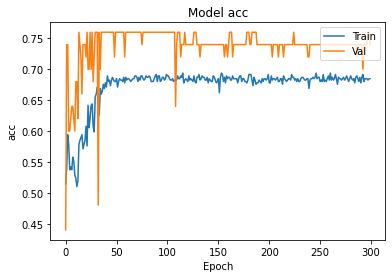

In [27]:
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plot.show()
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('Model acc')
plot.ylabel('acc')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plot.show()


# UNSUPERVISED LEARNING - K means clusterning

In [28]:
from sklearn.cluster import KMeans

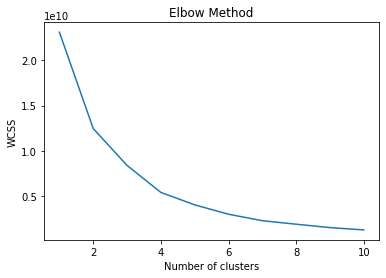


Accuracy: 0.05091649694501019


In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plot.plot(range(1, 11), wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred_y_kn = kmeans.fit_predict(X_train)
result2 = accuracy_score(Y_train, pred_y_kn)
print("\nAccuracy:",result2)


**ON UNSEEN DATA BY LOGISTIC REGRESSION**

In [31]:
data1 = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')
data1 = data1.drop(columns=['Loan_ID'])
data1_df_encoded = pd.get_dummies(data1,drop_first=True)
data1_df_encoded.head()
imp1 = SimpleImputer(strategy='mean')
imp1_train = imp1.fit(data1_df_encoded)
data1_df_encoded = imp1_train.transform(data1_df_encoded)
predict= LR.predict(data1_df_encoded)
data1['Y/N']= predict
data1.to_csv('predicted.csv')